# Air Quality Summer School Data Analysis With Python (jupyter notebook)

This note is to help participants work with some air quality data by cleaning and preprocessing the data before visualizing
to understand what the air quality is within some areas

This is divided into different sections. The first part of the work is preprocessing(cleaning) of the data into
a structure that will be easy to MINE for information
This code was put together by:

Cosmos Senyo Wemegah (UENR-EORIC)

James Nimoh (UG-AFRISET)

Victoria Owusu-Tawaih (CAF)

Various section of the code can be adopted and used for other purposes.
Please do not open or edit the codes in CLEANING_FUNCTION and AQI_FUNCTION unless you understand what you are doing with the code. A change in these might affect other portions of the code.

## Data Preprocessing (Cleaning) and Restructuring

This section preprocess the data (both meteorological data and air quality data) into a form that will be used later

The line of code below will import the packages that will be require to do specific works in this section
Some functions has been developed for this purpose and therefore will be called into the system.
Please make sure a file name (CLEANING_FUNCTIONS) exist in your working folder.

In [1]:
import pandas as pd
import numpy as np
import glob
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#the functions
from CLEANING_FUNCTIONS import *

We are setting some paths for our analysis. The data is contained in the "DATA" folder, some images can be stored in the "IMAGE" folder. "in_data_path" is the path to the data while "out_data_path" is the path to store other data we may generate from this work.

In [2]:
in_data_path = '../DATA/'
out_data_path = '../DATA/CLEANED_DATA/'
image_path = '../IMAGES/'

## Meteorological Data cleaning
The meteorological data will be worked on first. The data (EX_MET_DATA.csv is the filename of the meteorological data)is called in using the read_csv with some parameters set. 

In [3]:
met_data = pd.read_csv(in_data_path+'EX_MET_DATA.csv', na_values=[-99.9, -9.99, -9999, 'M'], parse_dates=['date_time'],index_col='date_time')

View the imported data to understand the structure and some variables contained in the data

In [4]:
met_data

,lon,lat,elevation,temperature,RH,wind_direc,wind_speed
date_time,,,,,,,
2019-01-01 00:00:00,-0.1115,4.5225,90,29.0,79.04,230.0,4.60
2019-01-01 01:00:00,-0.1115,4.5225,90,28.0,83.77,250.0,4.60
2019-01-01 02:00:00,-0.1115,4.5225,90,28.0,83.77,270.0,4.60
2019-01-01 03:00:00,-0.1115,4.5225,90,27.0,88.83,260.0,5.75
2019-01-01 04:00:00,-0.1115,4.5225,90,27.0,83.66,270.0,5.75
...,...,...,...,...,...,...,...
2020-12-30 19:00:00,-0.1115,4.5225,90,28.0,88.90,180.0,6.90
2020-12-30 20:00:00,-0.1115,4.5225,90,28.0,88.90,180.0,6.90
2020-12-30 21:00:00,-0.1115,4.5225,90,28.0,88.90,180.0,5.75


Dropping some columns not needed. The lon, lat and elevation columns will not be used in this work so we can drop to reduce the number of columns we are working with.

In [5]:
met_data = met_data.drop(columns=["lon","lat","elevation"])

The wind data is in miles-per-hour(mph) which will be converted to metres-per-seconds(mps) using the function "wind_mph_to_mps" which will require the windspeed column.

In [6]:
met_data['windspd_mps'] = wind_mph_to_mps(met_data['wind_speed']) 

Aggregate the data to form some daily and monthly data for use later if you wish (May not really be necessary for this work)
The data will be saved in an output as met_data_daily (daily data) and met_data_monthly (monthly data)

In [7]:
met_data_daily = met_data.resample('D').mean()    #aggregating a daily data
met_data_monthly = met_data.resample('M').mean()  #aggregating a monthly data

met_data_daily.to_csv(out_data_path +'daily_met_output.csv') #saving output
met_data_monthly.to_csv(out_data_path +'monthly_met_output.csv') #saving output

Now lets continue with the real work. This practical section will only focus on the period with continues data.
We will select 1st January 2020 to 31st December 2020.
We will also drop the mph wind sicne we have converted it and view the new form of the data

In [8]:
met_data_2020 = work_on_time(met_data,'2020-01-01','2020-12-31') # 2020 period
met_data_2020.drop(columns=['wind_speed'],inplace=True) #dropping column
met_data_2020

C:\Users\CLi\AppData\Local\Temp\ipykernel_18812\2521555585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_data_2020.drop(columns=['wind_speed'],inplace=True) #dropping column


,temperature,RH,wind_direc,windspd_mps
date_time,,,,
2020-01-01 00:00:00,28.0,78.90,NaN,0.514081
2020-01-01 01:00:00,27.0,83.66,NaN,0.514081
2020-01-01 02:00:00,27.0,83.66,300.0,2.056325
2020-01-01 03:00:00,26.0,88.75,280.0,2.570407
2020-01-01 04:00:00,26.0,88.75,270.0,2.570407
...,...,...,...,...
2020-12-30 19:00:00,28.0,88.90,180.0,3.084488
2020-12-30 20:00:00,28.0,88.90,180.0,3.084488
2020-12-30 21:00:00,28.0,88.90,180.0,2.570407


## Air Quality Data cleaning
Let us hold on with the meteorological data for now and move to the cleaning of the pollutant dataset.
This data is a purpleAir sensor data for 2 locations in Accra.
The code below reads in the various data sets. (For more information on the dataset please see facilitators later)

In [17]:
ajo_data = pd.read_csv(in_data_path+'AJ_O.csv', na_values=[-99.9, -9.99, -9999, 'M'], parse_dates=['created_at'],index_col='created_at')    
aju_data = pd.read_csv(in_data_path+'AJ_U.csv', na_values=[-99.9, -9.99, -9999, 'M'], parse_dates=['created_at'],index_col='created_at')    
djo_data = pd.read_csv(in_data_path+'DJ_O.csv', na_values=[-99.9, -9.99, -9999, 'M'], parse_dates=['created_at'],index_col='created_at')     
dju_data = pd.read_csv(in_data_path+'DJ_U.csv', na_values=[-99.9, -9.99, -9999, 'M'], parse_dates=['created_at'],index_col='created_at')    

Uncomment (remove the # in front of each line - 1 at a time) each one to check the various columns of the data to work with and understand the data structure 

In [18]:
ajo_data
#aju_data
#djo_data
#dju_data

,site,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
created_at,,,,,,,,,
2019-04-08 17:00:00+00:00,AJ_O,23.44,70.37,142.26,20.36,-46.82,70.36,28.15,48.03
2019-04-08 18:00:00+00:00,AJ_O,0.47,0.20,0.29,61.66,-45.52,74.79,25.52,0.20
2019-04-09 14:00:00+00:00,AJ_O,0.00,0.20,0.40,1.33,-47.67,67.33,29.33,0.20
2019-04-09 15:00:00+00:00,AJ_O,16.92,50.50,106.97,33.33,-48.20,74.89,23.31,34.13
2019-04-09 16:00:00+00:00,AJ_O,1.06,0.13,0.13,84.66,-47.84,80.56,19.78,0.13
...,...,...,...,...,...,...,...,...,...
2020-10-29 07:00:00+00:00,AJ_O,27.99,41.11,45.81,1183.93,-67.74,95.07,48.33,35.45
2020-10-29 08:00:00+00:00,AJ_O,14.22,19.70,22.62,1240.00,-67.56,101.92,38.84,19.65
2020-10-29 09:00:00+00:00,AJ_O,27.59,38.49,42.97,1308.00,-73.63,102.00,38.63,34.34


Application of some functions from this section
We will find some average at single location using "avg_pms_of_2". we will explain a few things here but nothing to worry about.

In [19]:
ajo_data['pm25_avg'] = avg_pms_of_2(ajo_data['PM2.5_CF1_ug/m3'], aju_data['PM2.5_CF1_ug/m3'])
ajo_data['pm10_avg'] = avg_pms_of_2(ajo_data['PM10.0_CF1_ug/m3'], aju_data['PM10.0_CF1_ug/m3'])
djo_data['pm25_avg'] = avg_pms_of_2(djo_data['PM2.5_CF1_ug/m3'], dju_data['PM2.5_CF1_ug/m3'])
djo_data['pm10_avg'] = avg_pms_of_2(djo_data['PM10.0_CF1_ug/m3'], dju_data['PM10.0_CF1_ug/m3'])

After averaging, we will work on removing '+' in the datetime which will make it easier to work with the time component.
We will provide a date also for the data to be truncated within the study period for this practical section as we did to the meteorological data.
They (met and aq data) must have the same working period.

In [20]:
ajo_data_2020 = work_on_time(ajo_data,'2020-01-01','2020-12-31')
djo_data_2020 = work_on_time(djo_data,'2020-01-01','2020-12-31')

The temperature column is in Fahrenheit and can be converted to celcius using a function (Fahren_2_Celcius). Dont worry about the warning.

In [21]:
ajo_data_2020['Sens_temp'] = Fahren_2_Celcius(ajo_data['Temperature_F'])
djo_data_2020['Sens_temp'] = Fahren_2_Celcius(djo_data['Temperature_F'])

C:\Users\CLi\AppData\Local\Temp\ipykernel_18812\4009803714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ajo_data_2020['Sens_temp'] = Fahren_2_Celcius(ajo_data['Temperature_F'])
C:\Users\CLi\AppData\Local\Temp\ipykernel_18812\4009803714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  djo_data_2020['Sens_temp'] = Fahren_2_Celcius(djo_data['Temperature_F'])


View the data now and lets drop some columns we may not need in this practical (uncomment each line -one at a time)

In [22]:
#ajo_data_2020
#djo_data_2020

Lets drop some columns now. The other line of codes will concatenate (something like merge) the two data and lets have view to see the new form of the data (we will depend on this as data covering Accra which may not be real representation). Mind you this is only giving you a hands-on and how to work around similar data sets.

In [23]:
ajo_data_2020.drop(columns=['PM1.0_CF1_ug/m3','UptimeMinutes','RSSI_dbm','PM2.5_ATM_ug/m3'],inplace=True)
djo_data_2020.drop(columns=['PM1.0_CF1_ug/m3','UptimeMinutes','RSSI_dbm','PM2.5_ATM_ug/m3'],inplace=True)

#concat
pm25_data = pd.concat([ajo_data_2020['pm25_avg'], djo_data_2020['pm25_avg']], axis=1) #merges the data with different dates/index
pm25_data = pm25_data.mean(axis=1)
pm25_data

C:\Users\CLi\AppData\Local\Temp\ipykernel_18812\4240276155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ajo_data_2020.drop(columns=['PM1.0_CF1_ug/m3','UptimeMinutes','RSSI_dbm','PM2.5_ATM_ug/m3'],inplace=True)
C:\Users\CLi\AppData\Local\Temp\ipykernel_18812\4240276155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  djo_data_2020.drop(columns=['PM1.0_CF1_ug/m3','UptimeMinutes','RSSI_dbm','PM2.5_ATM_ug/m3'],inplace=True)


created_at
2020-01-01 00:00:00    128.385
2020-01-01 01:00:00    155.200
2020-01-01 02:00:00    353.380
2020-01-01 03:00:00    501.425
2020-01-01 04:00:00    399.520
                        ...   
2020-12-31 19:00:00     48.700
2020-12-31 20:00:00     53.140
2020-12-31 21:00:00     50.090
2020-12-31 22:00:00     58.965
2020-12-31 23:00:00     62.295
Freq: H, Length: 8784, dtype: float64

We will do same for the PM10, the sensor temperature data and RH data 

In [25]:
pm10_data = pd.concat([ajo_data_2020['pm10_avg'], djo_data_2020['pm10_avg']], axis=1) #merges the data with different dates/index
pm10_data = pm10_data.mean(axis=1)
#pm10_data

#finding average sensor based temperature for area
sensor_temp_data = pd.concat([ajo_data_2020['Sens_temp'], djo_data_2020['Sens_temp']], axis=1) #merges the data with different dates/index
sensor_temp_data = sensor_temp_data.mean(axis=1)
#sensor_temp_data

#finding average sensor based RH for area
sensor_RH_data = pd.concat([ajo_data_2020['Humidity_%'], djo_data_2020['Humidity_%']], axis=1) #merges the data with different dates/index
sensor_RH_data = sensor_RH_data.mean(axis=1)
#sensor_RH_data

## Secondary Wind Data
Let us leave the others for now and clean our wind data (reanalysis data).
The data was in "u10" and "v10" components and the wind speed and direction has been computed already. 
The code below import the data and makes a view of it

In [26]:
wind_data = pd.read_csv(in_data_path+'EX_Wind_Data.csv', na_values=[-99.9, -9.99, -9999, 'M'], parse_dates=['Time'],index_col='Time')
wind_data

,u10,v10,ws,wd
Time,,,,
2020-01-01 00:00:00,0.7577,0.2754,0.8062,250
2020-01-01 01:00:00,0.7894,-0.3005,0.8447,291
2020-01-01 02:00:00,0.7199,-0.3395,0.7959,295
2020-01-01 03:00:00,0.9917,-0.4053,1.0713,292
2020-01-01 04:00:00,1.1494,-0.5144,1.2593,294
...,...,...,...,...
2021-08-31 19:00:00,2.0306,1.3691,2.4490,236
2021-08-31 20:00:00,1.9370,1.1279,2.2415,240
2021-08-31 21:00:00,2.2398,0.9674,2.4398,247


The U10 and v10 columns can be dropped since it has already been used to calculate the wind speed and direction.
After dropping, some sorting is done the we have the wind data cleaned. 

In [27]:
wind_data = wind_data.drop(columns=['u10','v10'])
wind_data = wind_data.sort_values('Time', ascending=True)
wind_data

,ws,wd
Time,,
2020-01-01 00:00:00,0.8062,250
2020-01-01 01:00:00,0.8447,291
2020-01-01 02:00:00,0.7959,295
2020-01-01 03:00:00,1.0713,292
2020-01-01 04:00:00,1.2593,294
...,...,...
2021-12-08 19:00:00,3.5403,194
2021-12-08 20:00:00,3.2158,200
2021-12-08 21:00:00,3.1259,208


The wind direction is in degrees and needs to be converted to the direction itself.
We can have a view of it after.
The fucntions to use have 2 forms: the 8 cardinal points (the function is calc_WIND_category8) and 16 cardinal points (the function is calc_WIND_category8).

In [28]:
wind_data['direction'] = wind_data["wd"].apply(lambda x: calc_WIND_category8(x))
wind_data[~wind_data.wd.isna()].head(13)

,ws,wd,direction
Time,,,
2020-01-01 00:00:00,0.8062,250,W
2020-01-01 01:00:00,0.8447,291,W
2020-01-01 02:00:00,0.7959,295,NW
2020-01-01 03:00:00,1.0713,292,W
2020-01-01 04:00:00,1.2593,294,NW
2020-01-01 05:00:00,1.4755,302,NW
2020-01-01 06:00:00,1.6149,307,NW
2020-01-01 07:00:00,1.7298,306,NW
2020-01-01 08:00:00,1.7282,305,NW


In [29]:
##===========aggregating data to month and day ==========================================
#wind_daily = wind_data.resample('D').mean()    #aggregating a daily data
#wind_monthly = wind_data.resample('M').mean()  #aggregating a monthly data

In [30]:
#======saving the output (this might be useful but i have commented it out) ====================
#wind_daily.to_csv(out_data_path +'wind_data_daily.csv')
#wind_monthly.to_csv(out_data_path +'wind_data_monthly.csv')

Do a selection of the time period here

In [31]:
wind_data_2020 = work_on_time(wind_data,'2020-01-01','2020-12-31')
wind_data_2020

,ws,wd,direction
Time,,,
2020-01-01 00:00:00,0.8062,250,W
2020-01-01 01:00:00,0.8447,291,W
2020-01-01 02:00:00,0.7959,295,NW
2020-01-01 03:00:00,1.0713,292,W
2020-01-01 04:00:00,1.2593,294,NW
...,...,...,...
2020-12-31 19:00:00,3.3918,195,S
2020-12-31 20:00:00,2.9545,204,SW
2020-12-31 21:00:00,2.6188,218,SW


## Check the cleaned datasets
Now that we have cleaned all the data and restructure them, let us view them and be sure of what we are dealing with
Uncomment them one at a time and run to see the output
The met data, pm2.5 data, pm10 data, Temperature and RH from Sensor, wind speed and direction and from reanalysis data

In [ ]:
  
#met_data_2020
#pm25_data
#pm10_data 
#sensor_temp_data
#sensor_RH_data
#wind_data_2020

In [29]:
#indirect merging of all the available dataset
#we will create new columns in the met data 
#then we will add the required datasets

cleaned_met_aq = met_data_2020
cleaned_met_aq['uncorrected_pm25'],cleaned_met_aq['pm10_avg'] = pm25_data,pm10_data
cleaned_met_aq['sens_temp'],cleaned_met_aq['sens_RH'] = sensor_temp_data,sensor_RH_data
cleaned_met_aq['windspeed'],cleaned_met_aq['wd'],cleaned_met_aq['direction'] = wind_data_2020.ws,wind_data_2020.wd,wind_data_2020.direction

cleaned_met_aq

C:\Users\CLi\AppData\Local\Temp\ipykernel_11644\3492724774.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_met_aq['uncorrected_pm25'],cleaned_met_aq['pm10_avg'] = pm25_data,pm10_data
C:\Users\CLi\AppData\Local\Temp\ipykernel_11644\3492724774.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_met_aq['sens_temp'],cleaned_met_aq['sens_RH'] = sensor_temp_data,sensor_RH_data
C:\Users\CLi\AppData\Local\Temp\ipykernel_11644\3492724774.py:8: SettingWithCopyWarning: 
A value is trying to be set 

,temperature,RH,wind_direc,windspd_mps,uncorrected_pm25,pm10_avg,sens_temp,sens_RH,windspeed,wd,direction
date_time,,,,,,,,,,,
2020-01-01 00:00:00,28.0,78.90,NaN,0.514081,128.385,154.150,30.0,64.73,0.8062,250,W
2020-01-01 01:00:00,27.0,83.66,NaN,0.514081,155.200,186.100,29.0,65.97,0.8447,291,W
2020-01-01 02:00:00,27.0,83.66,300.0,2.056325,353.380,439.740,29.0,67.37,0.7959,295,NW
2020-01-01 03:00:00,26.0,88.75,280.0,2.570407,501.425,637.005,28.0,70.37,1.0713,292,W
2020-01-01 04:00:00,26.0,88.75,270.0,2.570407,399.520,499.025,28.0,70.50,1.2593,294,NW
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,28.0,88.90,180.0,3.084488,66.400,74.590,32.0,83.00,3.2235,183,S
2020-12-30 20:00:00,28.0,88.90,180.0,3.084488,65.315,72.815,32.0,87.40,2.9339,189,S
2020-12-30 21:00:00,28.0,88.90,180.0,2.570407,79.690,90.675,31.0,91.60,2.5759,195,S


In [33]:
#checking for missing data in RHs and temperatures
#cleaned_met_aq[['RH','sens_RH']].isnull().any(), cleaned_met_aq[['temperature','sens_temp']].isnull().any()

(RH         True
 sens_RH    True
 dtype: bool,
 temperature    True
 sens_temp      True
 dtype: bool)

In [35]:
#==== Now to correct the pm2.5 with the correction factor
# call the fucntion to work (correct_pm25)
#this requires input from the data, the pm column temperature and RH columns

cleaned_met_aq['pm25_avg'] = correct_pm25(cleaned_met_aq,'uncorrected_pm25','sens_temp','sens_RH')
cleaned_met_aq

C:\Users\CLi\AppData\Local\Temp\ipykernel_11644\520032470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_met_aq['pm25_avg'] = correct_pm25(cleaned_met_aq,'uncorrected_pm25','sens_temp','sens_RH')


,temperature,RH,wind_direc,windspd_mps,uncorrected_pm25,pm10_avg,sens_temp,sens_RH,windspeed,wd,direction,pm25_avg
date_time,,,,,,,,,,,,
2020-01-01 00:00:00,28.0,78.90,NaN,0.514081,128.385,154.150,30.0,64.73,0.8062,250,W,75.6655
2020-01-01 01:00:00,27.0,83.66,NaN,0.514081,155.200,186.100,29.0,65.97,0.8447,291,W,88.7644
2020-01-01 02:00:00,27.0,83.66,300.0,2.056325,353.380,439.740,29.0,67.37,0.7959,295,NW,195.9496
2020-01-01 03:00:00,26.0,88.75,280.0,2.570407,501.425,637.005,28.0,70.37,1.0713,292,W,274.7239
2020-01-01 04:00:00,26.0,88.75,270.0,2.570407,399.520,499.025,28.0,70.50,1.2593,294,NW,219.7108
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,28.0,88.90,180.0,3.084488,66.400,74.590,32.0,83.00,3.2235,183,S,47.4460
2020-12-30 20:00:00,28.0,88.90,180.0,3.084488,65.315,72.815,32.0,87.40,2.9339,189,S,47.3881
2020-12-30 21:00:00,28.0,88.90,180.0,2.570407,79.690,90.675,31.0,91.60,2.5759,195,S,54.1246


<Axes: xlabel='date_time'>

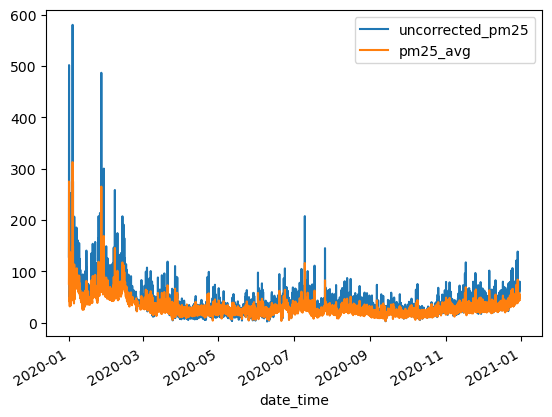

In [36]:
#compare the corrected and uncorrected pm25 and discuss your observation
cleaned_met_aq[['uncorrected_pm25','pm25_avg']].plot()

In [37]:
#========== creating columns for hour of day, day of month, month of year and season ====================
cleaned_met_aq['hour_of_day'] = cleaned_met_aq.index.hour       #creating hour of day
cleaned_met_aq['day_of_month'] = cleaned_met_aq.index.day       #creating day of month
cleaned_met_aq['day_of_week'] = cleaned_met_aq.index.weekday       #creating day of week
cleaned_met_aq['month_of_year'] = cleaned_met_aq.index.month    #creating month of year
cleaned_met_aq['year'] = cleaned_met_aq.index.year    #creating month of year

cleaned_met_aq

C:\Users\CLi\AppData\Local\Temp\ipykernel_11644\1343817582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_met_aq['hour_of_day'] = cleaned_met_aq.index.hour       #creating hour of day
C:\Users\CLi\AppData\Local\Temp\ipykernel_11644\1343817582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_met_aq['day_of_month'] = cleaned_met_aq.index.day       #creating day of month
C:\Users\CLi\AppData\Local\Temp\ipykernel_11644\1343817582.py:4: SettingWithCopyWarning: 
A value is trying to be set

,temperature,RH,wind_direc,windspd_mps,uncorrected_pm25,pm10_avg,sens_temp,sens_RH,windspeed,wd,direction,pm25_avg,hour_of_day,day_of_month,day_of_week,month_of_year,year
date_time,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,28.0,78.90,NaN,0.514081,128.385,154.150,30.0,64.73,0.8062,250,W,75.6655,0,1,2,1,2020
2020-01-01 01:00:00,27.0,83.66,NaN,0.514081,155.200,186.100,29.0,65.97,0.8447,291,W,88.7644,1,1,2,1,2020
2020-01-01 02:00:00,27.0,83.66,300.0,2.056325,353.380,439.740,29.0,67.37,0.7959,295,NW,195.9496,2,1,2,1,2020
2020-01-01 03:00:00,26.0,88.75,280.0,2.570407,501.425,637.005,28.0,70.37,1.0713,292,W,274.7239,3,1,2,1,2020
2020-01-01 04:00:00,26.0,88.75,270.0,2.570407,399.520,499.025,28.0,70.50,1.2593,294,NW,219.7108,4,1,2,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,28.0,88.90,180.0,3.084488,66.400,74.590,32.0,83.00,3.2235,183,S,47.4460,19,30,2,12,2020
2020-12-30 20:00:00,28.0,88.90,180.0,3.084488,65.315,72.815,32.0,87.40,2.9339,189,S,47.3881,20,30,2,12,2020
2020-12-30 21:00:00,28.0,88.90,180.0,2.570407,79.690,90.675,31.0,91.60,2.5759,195,S,54.1246,21,30,2,12,2020


In [44]:
cleaned_met_aq = create_seasons(cleaned_met_aq,'month_of_year')
cleaned_met_aq

C:\Users\CLi\AppData\Local\Temp\ipykernel_11644\4097771951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["season"] = data[MOY_column].replace(months,seasons)


,temperature,RH,wind_direc,windspd_mps,uncorrected_pm25,pm10_avg,sens_temp,sens_RH,windspeed,wd,direction,pm25_avg,hour_of_day,day_of_month,day_of_week,month_of_year,year,season
date_time,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,28.0,78.90,NaN,0.514081,128.385,154.150,30.0,64.73,0.8062,250,W,75.6655,0,1,2,1,2020,winter
2020-01-01 01:00:00,27.0,83.66,NaN,0.514081,155.200,186.100,29.0,65.97,0.8447,291,W,88.7644,1,1,2,1,2020,winter
2020-01-01 02:00:00,27.0,83.66,300.0,2.056325,353.380,439.740,29.0,67.37,0.7959,295,NW,195.9496,2,1,2,1,2020,winter
2020-01-01 03:00:00,26.0,88.75,280.0,2.570407,501.425,637.005,28.0,70.37,1.0713,292,W,274.7239,3,1,2,1,2020,winter
2020-01-01 04:00:00,26.0,88.75,270.0,2.570407,399.520,499.025,28.0,70.50,1.2593,294,NW,219.7108,4,1,2,1,2020,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,28.0,88.90,180.0,3.084488,66.400,74.590,32.0,83.00,3.2235,183,S,47.4460,19,30,2,12,2020,winter
2020-12-30 20:00:00,28.0,88.90,180.0,3.084488,65.315,72.815,32.0,87.40,2.9339,189,S,47.3881,20,30,2,12,2020,winter
2020-12-30 21:00:00,28.0,88.90,180.0,2.570407,79.690,90.675,31.0,91.60,2.5759,195,S,54.1246,21,30,2,12,2020,winter


In [45]:
cleaned_met_aq.columns

Index(['temperature', 'RH', 'wind_direc', 'windspd_mps', 'uncorrected_pm25',
       'pm10_avg', 'sens_temp', 'sens_RH', 'windspeed', 'wd', 'direction',
       'pm25_avg', 'hour_of_day', 'day_of_month', 'day_of_week',
       'month_of_year', 'year', 'season'],
      dtype='object')

In [47]:
#working on missing data # the missing data was not much was it was filled using the forward and backward fill method
cleaned_met_aq.fillna(method='ffill',limit=2, inplace=True)
cleaned_met_aq.fillna(method='bfill',limit=2, inplace=True)
cleaned_met_aq.isnull().any()

C:\Users\CLi\AppData\Local\Temp\ipykernel_11644\2654273384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_met_aq.fillna(method='ffill',limit=2, inplace=True)
C:\Users\CLi\AppData\Local\Temp\ipykernel_11644\2654273384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_met_aq.fillna(method='bfill',limit=2, inplace=True)


temperature         False
RH                  False
wind_direc          False
windspd_mps         False
uncorrected_pm25    False
pm10_avg            False
sens_temp           False
sens_RH             False
windspeed           False
wd                  False
direction           False
pm25_avg            False
hour_of_day         False
day_of_month        False
day_of_week         False
month_of_year       False
year                False
season              False
dtype: bool

In [49]:
#now rename the columns to fit 
cleaned_met_aq = cleaned_met_aq.rename(
    columns={
        "temperature":"obs_temp",
        "RH": "obs_RH",
        "windspd_mps": "obs_wind_speed",
        "pm10_avg": "PM10_ug/m3",
        "pm25_avg": "PM2.5_ug/m3",
        "sens_temp": "sensor_temp",
        "sens_RH": "sensor_RH",
    }
)

cleaned_met_aq

,obs_temp,obs_RH,wind_direc,obs_wind_speed,uncorrected_pm25,PM10_ug/m3,sensor_temp,sensor_RH,windspeed,wd,direction,PM2.5_ug/m3,hour_of_day,day_of_month,day_of_week,month_of_year,year,season
date_time,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,28.0,78.90,300.0,0.514081,128.385,154.150,30.0,64.73,0.8062,250,W,75.6655,0,1,2,1,2020,winter
2020-01-01 01:00:00,27.0,83.66,300.0,0.514081,155.200,186.100,29.0,65.97,0.8447,291,W,88.7644,1,1,2,1,2020,winter
2020-01-01 02:00:00,27.0,83.66,300.0,2.056325,353.380,439.740,29.0,67.37,0.7959,295,NW,195.9496,2,1,2,1,2020,winter
2020-01-01 03:00:00,26.0,88.75,280.0,2.570407,501.425,637.005,28.0,70.37,1.0713,292,W,274.7239,3,1,2,1,2020,winter
2020-01-01 04:00:00,26.0,88.75,270.0,2.570407,399.520,499.025,28.0,70.50,1.2593,294,NW,219.7108,4,1,2,1,2020,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,28.0,88.90,180.0,3.084488,66.400,74.590,32.0,83.00,3.2235,183,S,47.4460,19,30,2,12,2020,winter
2020-12-30 20:00:00,28.0,88.90,180.0,3.084488,65.315,72.815,32.0,87.40,2.9339,189,S,47.3881,20,30,2,12,2020,winter
2020-12-30 21:00:00,28.0,88.90,180.0,2.570407,79.690,90.675,31.0,91.60,2.5759,195,S,54.1246,21,30,2,12,2020,winter


In [50]:
#====working on wind direction of gmet data === 
#change the wind function name to Wd_in_deg_2_cardinal
cleaned_met_aq["obs_wind_direction"] = cleaned_met_aq["wind_direc"].apply(lambda x: calc_WIND_category8(x))
cleaned_met_aq[~cleaned_met_aq.wind_direc.isna()].head(13)

,obs_temp,obs_RH,wind_direc,obs_wind_speed,uncorrected_pm25,PM10_ug/m3,sensor_temp,sensor_RH,windspeed,wd,direction,PM2.5_ug/m3,hour_of_day,day_of_month,day_of_week,month_of_year,year,season,obs_wind_direction
date_time,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,28.0,78.90,300.0,0.514081,128.385,154.150,30.0,64.73,0.8062,250,W,75.6655,0,1,2,1,2020,winter,NW
2020-01-01 01:00:00,27.0,83.66,300.0,0.514081,155.200,186.100,29.0,65.97,0.8447,291,W,88.7644,1,1,2,1,2020,winter,NW
2020-01-01 02:00:00,27.0,83.66,300.0,2.056325,353.380,439.740,29.0,67.37,0.7959,295,NW,195.9496,2,1,2,1,2020,winter,NW
2020-01-01 03:00:00,26.0,88.75,280.0,2.570407,501.425,637.005,28.0,70.37,1.0713,292,W,274.7239,3,1,2,1,2020,winter,W
2020-01-01 04:00:00,26.0,88.75,270.0,2.570407,399.520,499.025,28.0,70.50,1.2593,294,NW,219.7108,4,1,2,1,2020,winter,W
2020-01-01 05:00:00,25.0,88.67,280.0,2.570407,326.980,398.215,27.0,70.60,1.4755,302,NW,179.0212,5,1,2,1,2020,winter,W
2020-01-01 06:00:00,26.0,88.75,300.0,2.056325,286.010,341.330,28.0,68.81,1.6149,307,NW,158.2126,6,1,2,1,2020,winter,NW
2020-01-01 07:00:00,26.0,88.75,300.0,1.028163,185.835,220.540,32.0,60.47,1.7298,306,NW,109.2373,7,1,2,1,2020,winter,NW
2020-01-01 08:00:00,27.0,83.66,10.0,1.542244,84.230,101.365,35.0,51.20,1.7282,305,NW,57.8482,8,1,2,1,2020,winter,N


In [52]:
# rearrange columns
cleaned_met_aq = cleaned_met_aq[['year','season','month_of_year','day_of_week',
                           'day_of_month','hour_of_day','obs_temp','obs_RH',
                           'obs_wind_speed','obs_wind_direction','wind_direc',
                           'sensor_temp','sensor_RH','windspeed','direction','wd',
                           'PM2.5_ug/m3','PM10_ug/m3','uncorrected_pm25']]

cleaned_met_aq

,year,season,month_of_year,day_of_week,day_of_month,hour_of_day,obs_temp,obs_RH,obs_wind_speed,obs_wind_direction,wind_direc,sensor_temp,sensor_RH,windspeed,direction,wd,PM2.5_ug/m3,PM10_ug/m3,uncorrected_pm25
date_time,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020,winter,1,2,1,0,28.0,78.90,0.514081,NW,300.0,30.0,64.73,0.8062,W,250,75.6655,154.150,128.385
2020-01-01 01:00:00,2020,winter,1,2,1,1,27.0,83.66,0.514081,NW,300.0,29.0,65.97,0.8447,W,291,88.7644,186.100,155.200
2020-01-01 02:00:00,2020,winter,1,2,1,2,27.0,83.66,2.056325,NW,300.0,29.0,67.37,0.7959,NW,295,195.9496,439.740,353.380
2020-01-01 03:00:00,2020,winter,1,2,1,3,26.0,88.75,2.570407,W,280.0,28.0,70.37,1.0713,W,292,274.7239,637.005,501.425
2020-01-01 04:00:00,2020,winter,1,2,1,4,26.0,88.75,2.570407,W,270.0,28.0,70.50,1.2593,NW,294,219.7108,499.025,399.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,2020,winter,12,2,30,19,28.0,88.90,3.084488,S,180.0,32.0,83.00,3.2235,S,183,47.4460,74.590,66.400
2020-12-30 20:00:00,2020,winter,12,2,30,20,28.0,88.90,3.084488,S,180.0,32.0,87.40,2.9339,S,189,47.3881,72.815,65.315
2020-12-30 21:00:00,2020,winter,12,2,30,21,28.0,88.90,2.570407,S,180.0,31.0,91.60,2.5759,S,195,54.1246,90.675,79.690


<Axes: xlabel='date_time'>

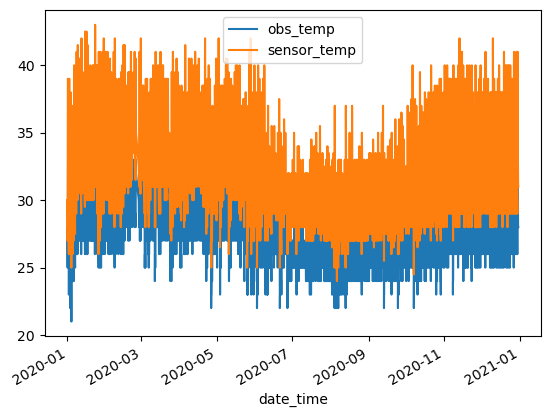

In [53]:
cleaned_met_aq[['obs_temp','sensor_temp']].plot()

<Axes: xlabel='date_time'>

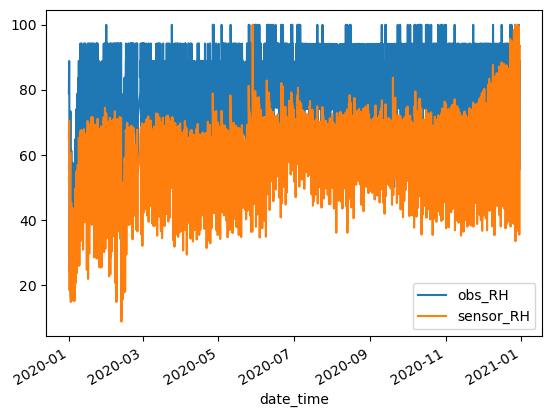

In [54]:
cleaned_met_aq[['obs_RH','sensor_RH']].plot()

<Axes: xlabel='date_time'>

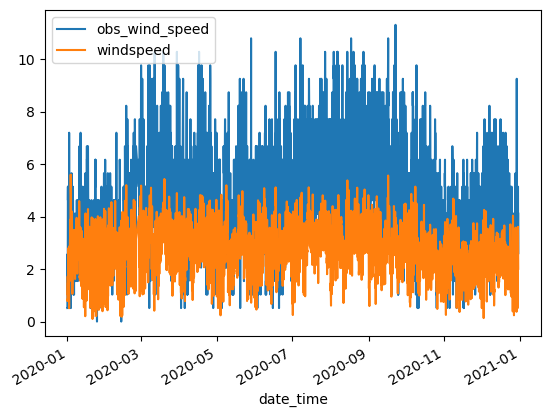

In [56]:
cleaned_met_aq[['obs_wind_speed','windspeed']].plot()

In [57]:
cleaned_met_aq.to_csv(out_data_path+'cleaned_met_aq_data.csv')